# 01 Data Exploration

In this notebook, we load and explore the raw data to understand its structure and content. 

In [4]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# Imports
import sys
import os

from data_loading import load_data
from data_exploration import print_dataset_info, analyze_features_dict, check_missing_values
from utils import correlation_matrix, mutual_information, point_biserial_correlation

#### Data loading

In [7]:
# Load the raw data
data_path = "../data"
x_train, x_test, y_train, train_ids, test_ids, feature_names, feature_dict = load_data(data_path)

Loading raw data...
Data loaded.


#### Informations about the dataset and dictionnary of features

In [8]:
# Print information about the dataset
print_dataset_info(x_train, y_train, x_test, feature_dict)

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
321 features:
The first column of the datasets is the "sample id" and is not in the dictionary



In [9]:
# Print informations about the features
analyze_features_dict(feature_dict)

Features Dict Information

Total number of features: 321

Number of categorical features: 253
Number of numerical features: 64

Number of features to be discarded: 43

Categorical feature subtypes:
  nominal: 46
  undefined: 31
  ordinal: 68
  binary: 108

Numerical feature subtypes:
  discrete: 29
  continuous: 35

Encoding types:
  one-hot: 43
  none: 87
  binary: 108
  past_30_days: 2
  frequency: 8
  date: 2
  health_check: 3


#### Checking missing values, feature-feature correlation and feature-target correlation

In [10]:
# Check missing values
check_missing_values(x_train, x_test, feature_names, p=0.9)

Overall missing values:
 - x_train missing values: 47175779 (44.79%)
 - x_test missing values: 15724379 (44.79%)
 - Combined missing values: 62900158

Features with more than 90.00% missing values:
Total features with more than 90.00% missing values: 99
Total features with missing values: 239


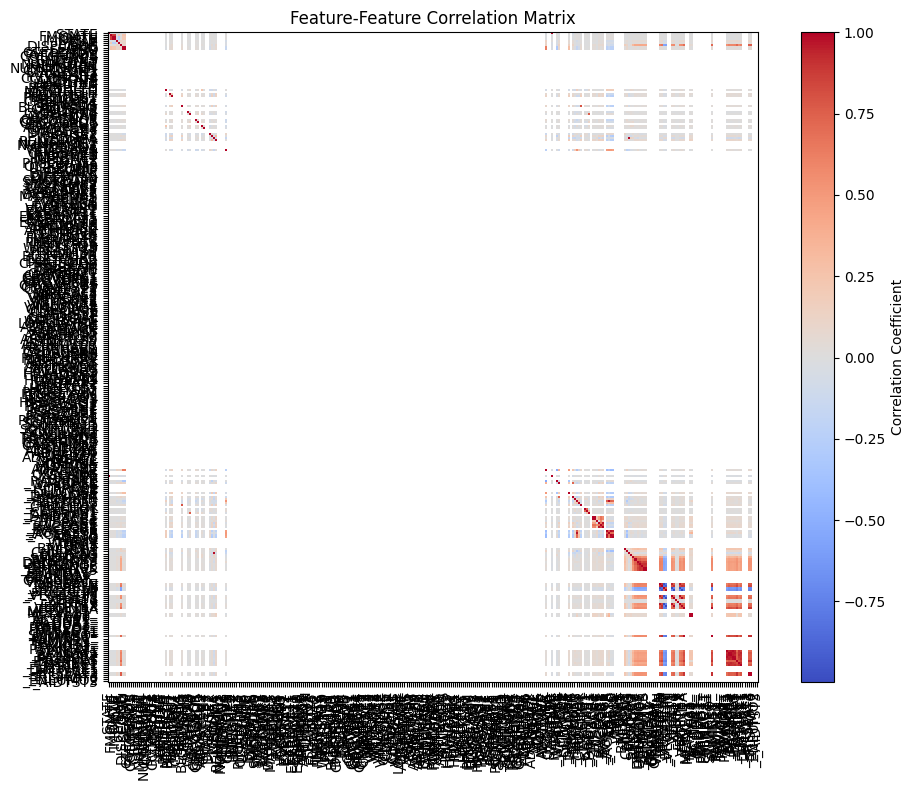

In [11]:
# Check feature-feature correlation in raw data
ff_correlation_matrix = correlation_matrix(x_train, feature_names, display_plot=True)

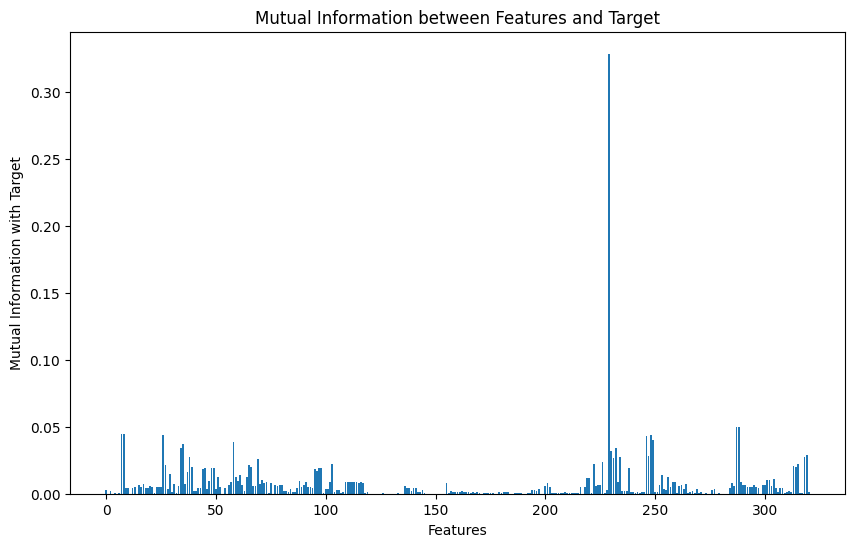

In [14]:
# Check mutual information between features and target
mi = mutual_information(x_train, y_train, display_plot=True)

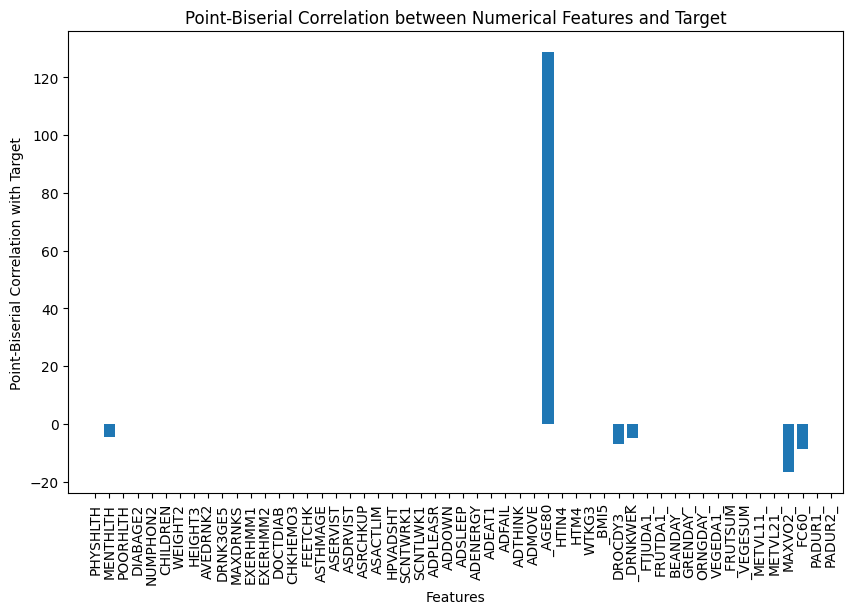

In [16]:
# Check point biserial correlation between features and target
pb_correlation = point_biserial_correlation(x_train, y_train, feature_dict, display_plot=True)